# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [303]:
!pip install pandas matplotlib plotly

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, HTML

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [305]:
try:
    df = pd.read_csv('matches.csv')
except FileNotFoundError:
    print("O arquivo 'matches.csv' não foi encontrado.")
    df = None

if df is not None:
    shape_df = pd.DataFrame([df.shape], columns=['Número de Linhas', 'Número de Colunas'])
    tipos_dados_df = pd.DataFrame(df.dtypes, columns=['Tipo de Dados'])
    dados_ausentes_df = pd.DataFrame(df.isnull().sum(), columns=['Dados Ausentes'])
    estatisticas_df = df.describe(include='all')

    def style(df, caption):
        return df.style.set_table_styles(
        [{'selector': 'thead th',
          'props': [('background-color', 'black'),
                    ('color', 'white'),  # Cor do texto do cabeçalho
                    ('border', '1px solid gray')]},
         {'selector': 'tbody td',
          'props': [('background-color', 'black'),
                    ('color', 'white'),  # Cor do texto das células
                    ('border', '1px solid gray')]},
         {'selector': 'caption',
          'props': [('background-color', 'black'),
                    ('color', 'white'),
                    ('font-size', '16px'),
                    ('font-weight', 'bold')]},
         {'selector': 'tr:nth-child(even)',
          'props': [('background-color', '#333'),
                    ('color', 'white')]},  # Cor do texto nas linhas pares
         {'selector': 'tr:nth-child(odd)',
          'props': [('background-color', '#222'),
                    ('color', 'white')]},  # Cor do texto nas linhas ímpares
        ]
    ).set_caption(caption)

    display(style(shape_df, 'Shape'))
    display(HTML("<br>"))
    display(style(tipos_dados_df, 'Tipos de Dados'))
    display(HTML("<br>"))
    display(style(dados_ausentes_df, 'Dados Ausentes'))
    display(HTML("<br>"))
    display(style(estatisticas_df, 'Estatísticas Básicas dos Dados'))
else:
    print("Não foi possível carregar os dados.")

,Número de Linhas,Número de Colunas
0,1389,28


,Tipo de Dados
Unnamed: 0,int64
date,object
time,object
comp,object
round,object
day,object
venue,object
result,object
gf,float64
ga,float64


,Dados Ausentes
Unnamed: 0,0
date,0
time,0
comp,0
round,0
day,0
venue,0
result,0
gf,0
ga,0


,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
count,1389.000000,1389,1389,1389,1389,1389,1389,1389,1389.000000,1389.000000,1389,1389.000000,1389.000000,1389.000000,693.000000,1389,1389,1389,1389,0.000000,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389
unique,nan,244,18,1,38,7,2,3,nan,nan,23,nan,nan,nan,nan,91,16,23,1,nan,nan,nan,nan,nan,nan,nan,nan,23
top,nan,2021-05-23,15:00,Premier League,Matchweek 1,Sat,Away,L,nan,nan,Southampton,nan,nan,nan,nan,Hugo Lloris,4-2-3-1,Anthony Taylor,Match Report,nan,nan,nan,nan,nan,nan,nan,nan,Southampton
freq,nan,20,286,1389,39,551,695,548,nan,nan,71,nan,nan,nan,nan,70,344,100,1389,nan,nan,nan,nan,nan,nan,nan,nan,72
mean,22.771778,nan,nan,nan,nan,nan,nan,nan,1.335493,1.380850,nan,1.304176,1.338445,49.702664,36089.963925,nan,nan,nan,nan,nan,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844,nan
std,13.668172,nan,nan,nan,nan,nan,nan,nan,1.274235,1.291049,nan,0.767268,0.789360,12.401897,17797.991778,nan,nan,nan,nan,nan,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951,nan
min,0.000000,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan,0.000000,0.000000,18.000000,2000.000000,nan,nan,nan,nan,nan,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000,nan
25%,11.000000,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan,0.700000,0.700000,40.000000,24351.000000,nan,nan,nan,nan,nan,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000,nan
50%,22.000000,nan,nan,nan,nan,nan,nan,nan,1.000000,1.000000,nan,1.200000,1.200000,50.000000,32061.000000,nan,nan,nan,nan,nan,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000,nan
75%,33.000000,nan,nan,nan,nan,nan,nan,nan,2.000000,2.000000,nan,1.800000,1.800000,59.000000,52214.000000,nan,nan,nan,nan,nan,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000,nan


## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

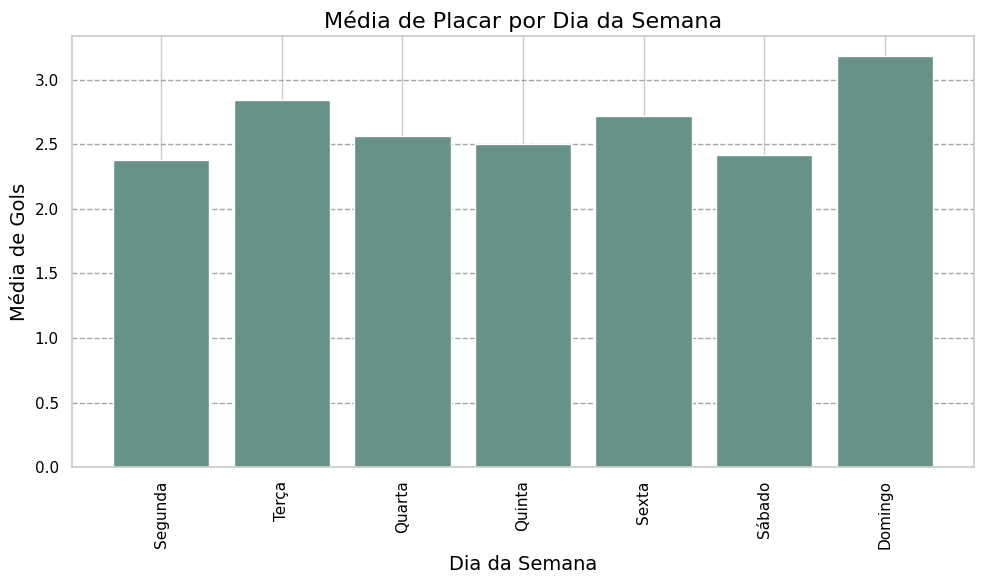

In [306]:
df['Data'] = pd.to_datetime(df['date'])

df['Dia da Semana'] = df['Data'].dt.day_name()

df['Total de Gols'] = df['gf'] + df['ga']

jogos_por_dia = df['Dia da Semana'].value_counts()

min_jogos = jogos_por_dia.min()

dfs_amostrados = []

for dia in jogos_por_dia.index:
    jogos_do_dia = df[df['Dia da Semana'] == dia]
    jogos_amostrados = jogos_do_dia.sample(n=min_jogos, replace=True)
    dfs_amostrados.append(jogos_amostrados)

df_equalizado = pd.concat(dfs_amostrados)

mapeamento_dias = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df_equalizado['Dia da Semana'] = df_equalizado['Dia da Semana'].replace(mapeamento_dias)

media_gols_por_dia = df_equalizado.groupby('Dia da Semana')['Total de Gols'].mean().reindex(
    ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
)

plt.figure(figsize=(10, 6))
bars = plt.bar(media_gols_por_dia.index, media_gols_por_dia, color='#679289')

plt.title('Média de Placar por Dia da Semana', fontsize=16, color='black')
plt.xlabel('Dia da Semana', fontsize=14, color='black')
plt.ylabel('Média de Gols', fontsize=14, color='black')
plt.xticks(rotation=90, color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

plt.tight_layout()
plt.show()

## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

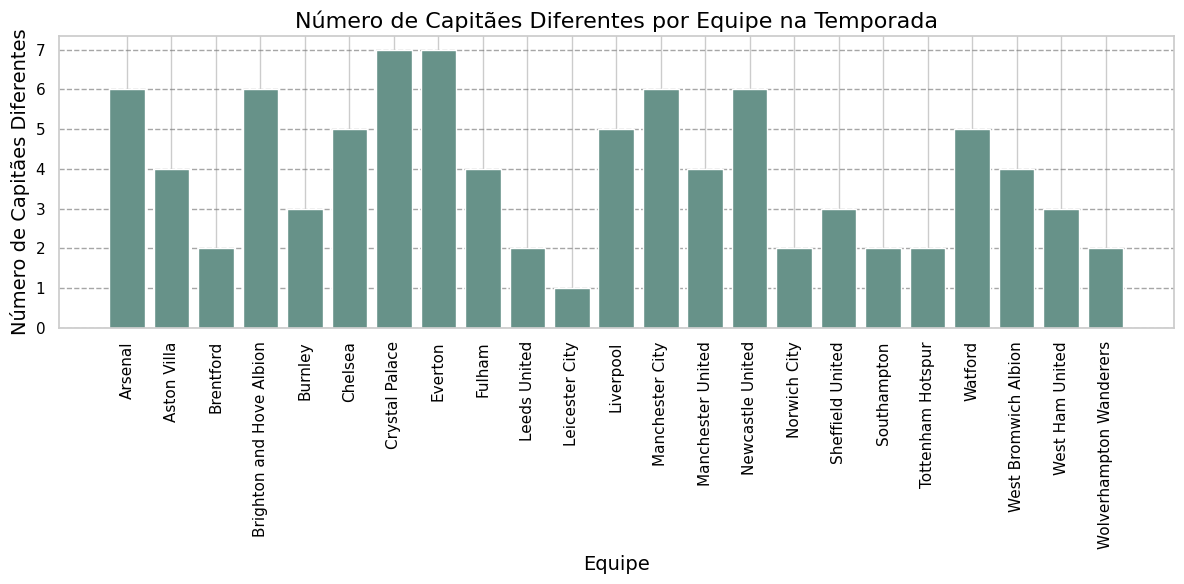

In [307]:
capitaes_unicos = df.groupby('team')['captain'].nunique().reset_index()

capitaes_unicos.columns = ['Equipe', 'Número de Capitães Diferentes']

capitaes_unicos = capitaes_unicos.sort_values(by='Equipe')

plt.figure(figsize=(12, 6))
bars = plt.bar(capitaes_unicos['Equipe'], capitaes_unicos['Número de Capitães Diferentes'], color='#679289')

plt.title('Número de Capitães Diferentes por Equipe na Temporada', fontsize=16, color='black')
plt.xlabel('Equipe', fontsize=14, color='black')
plt.ylabel('Número de Capitães Diferentes', fontsize=14, color='black')
plt.xticks(rotation=90, color='black')
plt.yticks(color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

plt.tight_layout()
plt.show()

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

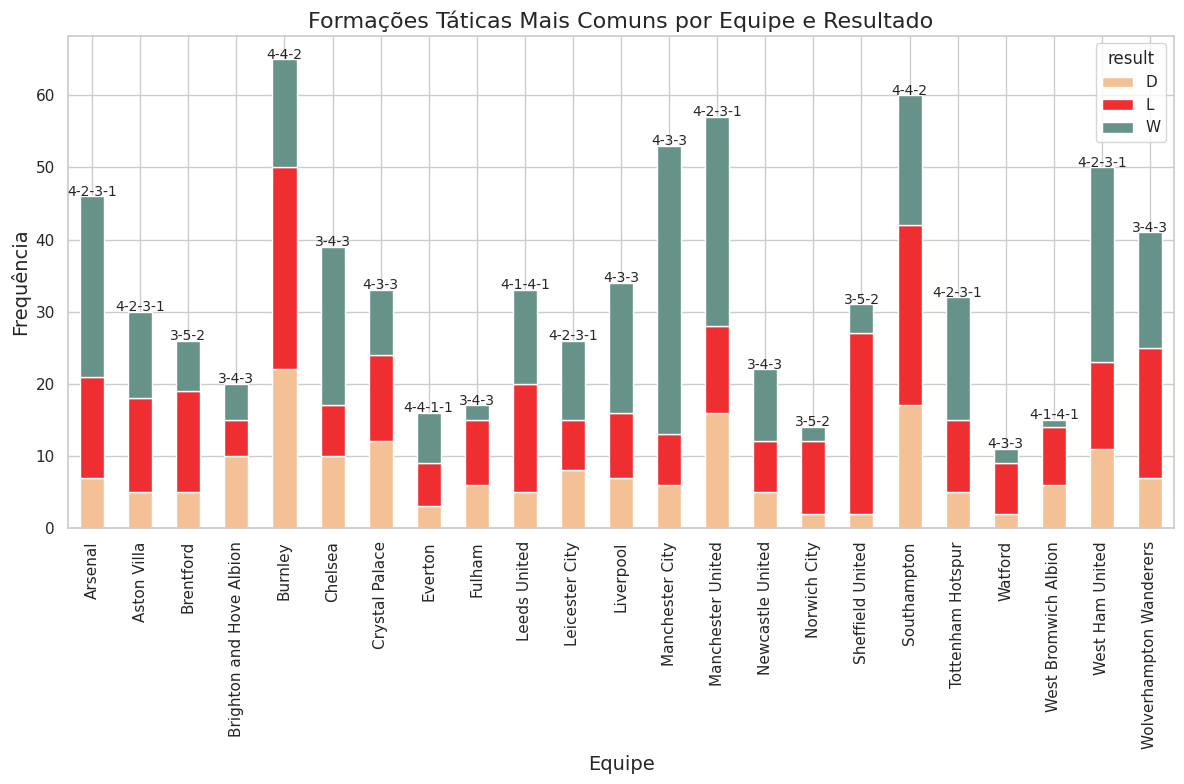

In [308]:
formacoes = df.groupby(['team', 'result', 'formation']).size().reset_index(name='frequencia')

formacoes_mais_comuns = formacoes.loc[formacoes.groupby(['team', 'result'])['frequencia'].idxmax()]

pivot = formacoes_mais_comuns.pivot_table(index='team', columns='result', values='frequencia', fill_value=0)

cores = {
    'W': '#679289',
    'D': '#F4C095',
    'L': '#EE2E31'
}

ax = pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=[cores.get(x, '#000000') for x in pivot.columns])

plt.title('Formações Táticas Mais Comuns por Equipe e Resultado', fontsize=16)
plt.xlabel('Equipe', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.xticks(rotation=90)

for i in range(len(pivot)):
    formation = formacoes_mais_comuns.loc[formacoes_mais_comuns['team'] == pivot.index[i]].iloc[0]['formation']
    total_height = pivot.iloc[i].sum()
    ax.text(i, total_height + 0.1, formation, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

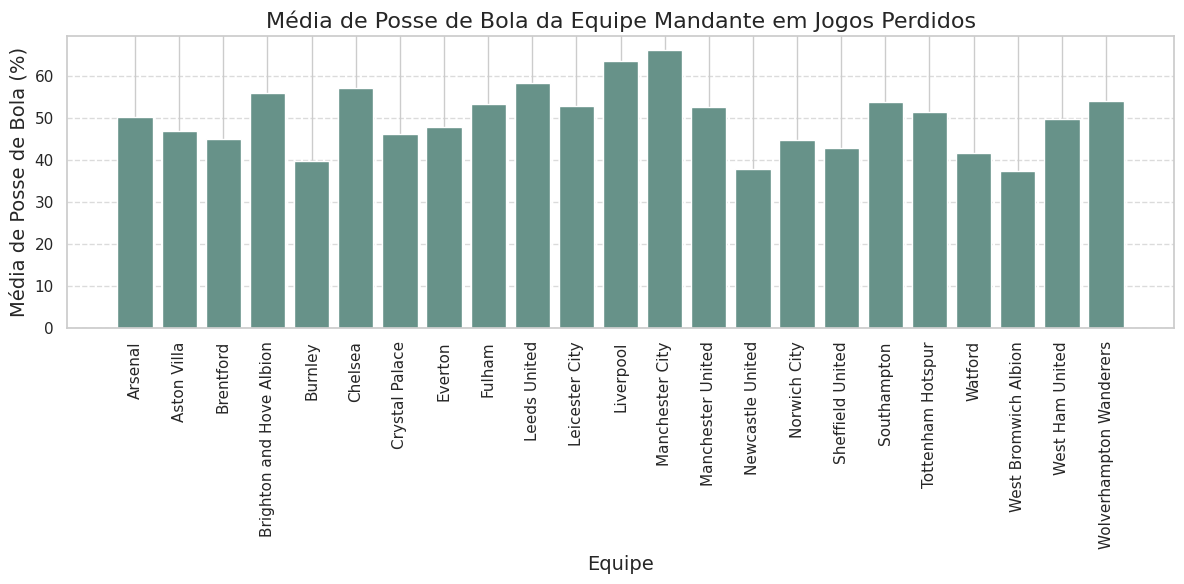

In [309]:
perdas = df[(df['result'] == 'L') & (df['venue'] == 'Home')]

media_posse_perdas = perdas.groupby('team')['poss'].mean().reset_index()

media_posse_perdas.columns = ['Equipe', 'Média de Posse de Bola (%)']

plt.figure(figsize=(12, 6))
plt.bar(media_posse_perdas['Equipe'], media_posse_perdas['Média de Posse de Bola (%)'], color='#679289')
plt.title('Média de Posse de Bola da Equipe Mandante em Jogos Perdidos', fontsize=16)
plt.xlabel('Equipe', fontsize=14)
plt.ylabel('Média de Posse de Bola (%)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [310]:
def obter_brasao(time):
    nome_time = time.lower().replace(" ", "-").replace("&", "and")

    if time == "Brighton and Hove Albion":
        return 'https://logodetimes.com/times/brighton-hove-albion-football-club/brighton-hove-albion-football-club-256.png'
    elif time == "Sheffield United":
        return 'https://upload.wikimedia.org/wikipedia/pt/4/49/Sheffield_United_FC.png'
    elif time == "West Bromwich Albion":
        return 'https://upload.wikimedia.org/wikipedia/pt/b/b1/West_Bromwich_Albion.png'
    elif time == "Fulham":
        return 'https://upload.wikimedia.org/wikipedia/pt/thumb/1/13/Fulham_FC.svg/1200px-Fulham_FC.svg.png'

    return f'https://logodetimes.com/times/{nome_time}-football-club/{nome_time}-football-club-256.png'

classificacao = df.groupby('team').agg({
    'result': lambda x: (x == 'W').sum() * 3 + (x == 'D').sum()
}).reset_index()

classificacao.columns = ['Equipe', 'Pontos']

classificacao = classificacao.sort_values(by='Pontos', ascending=False).reset_index(drop=True)

classificacao['Posição'] = classificacao.index + 1

classificacao['Brasão'] = classificacao['Equipe'].apply(obter_brasao)

def exibir_tabela(classificacao):
    html = '<table style="border-collapse: collapse; width: auto; text-align: center;">'
    html += '<tr><th style="padding: 5px;">Posição</th><th style="padding: 5px;">Brasão</th><th style="padding: 5px;">Equipe</th><th style="padding: 5px;">Pontos</th></tr>'

    for index, row in classificacao.iterrows():
        html += '<tr>'
        html += f'<td style="padding: 5px;">{row["Posição"]}</td>'
        html += f'<td style="padding: 5px;"><img src="{row["Brasão"]}" style="width: 32px; height: 32px;"></td>'
        html += f'<td style="padding: 5px;">{row["Equipe"]}</td>'
        html += f'<td style="padding: 5px;">{row["Pontos"]}</td>'
        html += '</tr>'

    html += '</table>'
    display(HTML(html))

exibir_tabela(classificacao)

Posição,Brasão,Equipe,Pontos
1,,Manchester City,166
2,,Chelsea,132
3,,Manchester United,128
4,,Arsenal,121
5,,Tottenham Hotspur,120
6,,West Ham United,117
7,,Leicester City,108
8,,Wolverhampton Wanderers,94
9,,Leeds United,93
10,,Aston Villa,92


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [311]:
publico_total = df.groupby('team')['attendance'].sum().reset_index()
publico_total.columns = ['team', 'publico_total']

fig = px.bar(
    publico_total,
    x='team',
    y='publico_total',
    title='Público Total por Equipe',
    labels={'publico_total': 'Público Total', 'team': 'Equipe'},
    color_discrete_sequence=['#679289'],
    text='publico_total'
)

fig.update_layout(
    title=dict(text='Público Total por Equipe', font=dict(size=20, color='black'), x=0.5),
    xaxis_tickangle=-90,
    xaxis=dict(title='Equipe', titlefont=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(title='Público Total', titlefont=dict(size=18), tickfont=dict(size=14)),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)

fig.update_xaxes(showgrid=True, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridcolor='LightGray', griddash='dot')

fig.update_layout(
    shapes=[
        dict(
            type='rect',
            x0=-0.5,
            y0=0,
            x1=len(publico_total) - 0.5,
            y1=publico_total['publico_total'].max() * 1.1,
            line=dict(color='LightGray', width=1),
            fillcolor='rgba(0,0,0,0)'
        )
    ]
)

def drilldown(time):
    detalhes = df[['team', 'attendance', 'date']].copy()
    detalhes['detail'] = detalhes['attendance'].astype(str) + " - " + detalhes['date'].astype(str)
    return detalhes[['team', 'attendance', 'detail']]

    fig_jogos.update_layout(
        title_x=0.5,
        xaxis_tickangle=-45,
        xaxis=dict(title='Data', titlefont=dict(size=16), tickfont=dict(size=14)),
        yaxis=dict(title='Público', titlefont=dict(size=16), tickfont=dict(size=14)),
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(color='black')
    )

    fig_jogos.show()

detalhamento = drilldown(df)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_title='Equipe', yaxis_title='Público Total')
fig.show()